# Importing Libraries

In [ ]:
# As a first step of our project we will be importing all the necessary libraries 

In [1]:
import re
import string
from collections import Counter
from unidecode import unidecode
import warnings

# data analysis
import numpy as np 
import pandas as pd 

# data vizualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
from matplotlib import rcParams
from IPython.display import Markdown, display
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap

# nlp
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import SnowballStemmer
import spacy
from spacy import displacy
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# scikit learn 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Data Acquisition  

In [ ]:
# As a second step in our project we will importing all the csv data sets we need for clustering and classification  

In [ ]:
# data set for classification

In [2]:
reviews = pd.read_csv('IMDB  Reviews.csv',nrows=10000)
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
reviews['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [ ]:
# data set for clustering 

In [4]:
questions = pd.read_csv('quora_questions.csv',nrows=10000)
questions.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


# Data Preprocessing

In [ ]:
# as the third step in our project we will be preprocessing the data so that we can build our machine learning models 
# on our text data

In [ ]:
""""
1) check for missing values
2) remove stop words 
3) remove html tags 
4) remove punc 
5) get stemmed words 
6) cleaned words should be alpha & len > 2 
7) convert to lower 
8) remove duplicate rows 
""""

In [ ]:
# check for missing values 

In [5]:
reviews.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# drop duplicates 

In [6]:
questions= questions.drop_duplicates('Question')

In [ ]:
# do the remaining processing steps in the list above 

In [7]:
# get stop words 
stop = set(stopwords.words('english')) 
# get stemmer 
sno = nltk.stem.SnowballStemmer('english') 

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [8]:
def clean_data(sentence):
    cleaned_review=' ' 
    s=''
    filtered_sentence=[]
    # clean html 
    sent=cleanhtml(sentence) 
    for w in sent.split():
        # clean punc 
        for cleaned_words in cleanpunc(w).split():
            # cleaned words should be alpha & len > 2 
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                # and  are lower and not stop words 
                if(cleaned_words.lower() not in stop):
                    # convert the clean word to lower stemmed form in utf 
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    
                else:
                    continue
            else:
                continue 
    cleaned_review = b" ".join(filtered_sentence) 
    return cleaned_review

In [9]:
reviews['cleaned_review'] = reviews['review'].apply(clean_data)

In [10]:
questions['cleaned_question'] = questions['Question'].apply(clean_data)

In [11]:
print('original document')
display(Markdown('> '+str(reviews['review'][25])))
print('cleaned document')
display(Markdown('> '+str(reviews['cleaned_review'][25])))

original document


> The Karen Carpenter Story shows a little more about singer Karen Carpenter's complex life. Though it fails in giving accurate facts, and details.<br /><br />Cynthia Gibb (portrays Karen) was not a fine election. She is a good actress , but plays a very naive and sort of dumb Karen Carpenter. I think that the role needed a stronger character. Someone with a stronger personality.<br /><br />Louise Fletcher role as Agnes Carpenter is terrific, she does a great job as Karen's mother.<br /><br />It has great songs, which could have been included in a soundtrack album. Unfortunately they weren't, though this movie was on the top of the ratings in USA and other several countries

cleaned document


> b'karen carpent stori show littl singer karen carpent complex life though fail give accur fact detail cynthia gibb portray karen fine elect good actress play naiv sort dumb karen carpent think role need stronger charact someon stronger person louis fletcher role agn carpent terrif great job karen mother great song could includ soundtrack album unfortun werent though movi top rate usa sever countri'

In [ ]:
#label encoding 

In [12]:
def posneg(x):
    if x=="negative":
        return 0
    elif x=="positive":
        return 1
    return x

In [13]:
reviews["score"] = reviews["sentiment"].map(posneg)

In [14]:
reviews.head()

,review,sentiment,cleaned_review,score
0,One of the other reviewers has mentioned that ...,positive,b'one review mention watch episod youll hook r...,1
1,A wonderful little production. <br /><br />The...,positive,b'wonder littl product film techniqu fashion g...,1
2,I thought this was a wonderful way to spend ti...,positive,b'thought wonder way spend time hot summer wee...,1
3,Basically there's a family where a little boy ...,negative,b'basic there famili littl boy jake think ther...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,b'petter mattei love time money visual stun fi...,1


In [15]:
questions.head()

,Question,cleaned_question
0,What is the step by step guide to invest in sh...,b'step step guid invest share market india'
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,b'stori kohinoor diamond'
2,How can I increase the speed of my internet co...,b'increas speed internet connect use vpn'
3,Why am I mentally very lonely? How can I solve...,b'mental lone solv'
4,"Which one dissolve in water quikly sugar, salt...",b'one dissolv water quik sugar salt methan car...


# Text Analytics

In [ ]:
# As a fourth step of our project we will be doing some basic analytics on our text using spacy and nltk 

In [16]:
nlp = spacy.load('en')

In [ ]:
#POS

In [17]:
review = reviews.iloc[25,0]
cleaned_review = cleanhtml(review)
cleaned_review = cleanpunc(cleaned_review)
doc = nlp(u'{}'.format(cleaned_review))
for token in doc[:16]:
    if token.pos_!="SPACE":
        print(token.text, token.pos_)

The DET
Karen PROPN
Carpenter PROPN
Story PROPN
shows VERB
a DET
little ADJ
more ADJ
about ADP
singer NOUN
Karen PROPN
Carpenters PROPN
complex ADJ
life NOUN
Though ADP


In [ ]:
# sentences

In [18]:
for sent in doc.sents:
    print(sent)
    print('\n')

The Karen Carpenter Story shows a little more about singer Karen Carpenters complex life  Though it fails in giving accurate facts  and details   Cynthia Gibb  portrays


Karen  was not a fine election  


She is a good actress   but plays a very naive and sort of dumb Karen Carpenter  


I think that the role needed a stronger character  Someone with a stronger personality   Louise Fletcher role as Agnes Carpenter is terrific  she does a great job as Karens mother   


It has great songs  which could have been included in a soundtrack album  


Unfortunately they werent  though this movie was on the top of the ratings in USA and other several countries




In [ ]:
# named entity extraction

In [19]:
colors = {'PERSON': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'GPE': 'radial-gradient(yellow, green)'}
options = {'ents': ['PERSON', 'GPE'], 'colors':colors}
displacy.render(doc, style='ent', jupyter=True, options=options)
print('GPE',spacy.explain('GPE'))

GPE Countries, cities, states


In [ ]:
# chunking(draw phrase as a parse tree of parts of speech tags) 

In [20]:
tokens = nltk.word_tokenize(cleaned_review)
tag = nltk.pos_tag(tokens)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
result.draw()

In [ ]:
# synonyms and antonyms 

In [20]:
synonyms = []
antonyms = []
for syn in wordnet.synsets("strong"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print('Synonyms:',set(synonyms))
print('Antonyms:',set(antonyms))

Synonyms: {'impregnable', 'potent', 'unattackable', 'firm', 'warm', 'secure', 'strong', 'inviolable', 'solid', 'substantial', 'unassailable', 'stiff', 'hard'}
Antonyms: {'weak', 'impotent'}


In [ ]:
# collocations(bigram, trigram) 

In [21]:
# bigram(2 words)
text = 'It has great songs  which could have been included in a soundtrack album'
Tokens = nltk.word_tokenize(text)
output = list(nltk.bigrams(Tokens))
print('bigram:',output)
# trigrams(3 words)
Tokens = nltk.word_tokenize(text)
output = list(nltk.trigrams(Tokens))
print('trigram:',output)

bigram: [('It', 'has'), ('has', 'great'), ('great', 'songs'), ('songs', 'which'), ('which', 'could'), ('could', 'have'), ('have', 'been'), ('been', 'included'), ('included', 'in'), ('in', 'a'), ('a', 'soundtrack'), ('soundtrack', 'album')]
trigram: [('It', 'has', 'great'), ('has', 'great', 'songs'), ('great', 'songs', 'which'), ('songs', 'which', 'could'), ('which', 'could', 'have'), ('could', 'have', 'been'), ('have', 'been', 'included'), ('been', 'included', 'in'), ('included', 'in', 'a'), ('in', 'a', 'soundtrack'), ('a', 'soundtrack', 'album')]


# Text Clustering

In [ ]:
# As a fifth step of our project we will create a cluster of topics using k means text clustering algorithm 
# for a dataset having 10000 quora questions 

In [ ]:
# k means clustering 
"""
It's an un supervised learning model that finds the underlying structure of a dataset;it creates groups of data points 
such that points in different clusters are dissimilar while points within a cluster are similar.
With k-means clustering, we want to cluster our data points into k groups. 
A larger k creates smaller groups with more granularity(distinguishable), a lower k means larger groups and 
less granularity.
The output of the algorithm would be a set of “labels” assigning each data point to one of the 
k groups. 
In k-means clustering, the way these groups are defined is by creating a centroid for each group. 
The centroids are like the heart of the cluster, they “capture” the points closest to them and add them to the cluster.
"""

In [ ]:
# feature extraction 

In [ ]:
"""
TF-IDF(Term Frequency Inverse document frequency) Vectorizing
This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies 
the importance of the word in the document and corpus
Terminology:
t — term (word)
d — document (set of words)
N — count of corpus
corpus — the total document set
Term Frequency:tf(t,d) = count of t in d / number of words in d
Document Frequency:df(t) = occurrence of t in documents
Inverse document frequency:idf(t) = log(N/(df + 1))
tf-idf(t, d) = tf(t, d) * log(N/(df + 1))
n grams: The lower and upper boundary of the range of n-values
"""

In [22]:
corpus = questions['cleaned_question'].tolist()

In [23]:
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 1000)
X_Vect = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X_Vect.toarray(), columns=vectorizer.get_feature_names())
final_df = tf_idf

In [24]:
final_df.head()

,abl,abroad,accept,access,account,achiev,acn,act,activ,actor,...,worst,worth,write,writer,wrong,year,yes,young,youtub,youv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# parameter tuning using elbow method by plotting k values vs inertia 
"""
1)Inertia: tells how far away the points within a cluster are. Therefore, a small of inertia is needed.
How many clusters(elbow method):The idea behind good clustering is having a small value of inertia, 
and small number of clusters; The value of inertia decreases as the number of clusters increase 
and such point is called elbow point;
sum of squared distances of samples to their closest cluster center
"""

In [25]:
def plot_inertia(max_k,inertia):
    plt.figure(figsize=(12,6))    
    plt.grid()
    plt.plot(range(1,max_k),inertia, linewidth=2, color="red", marker ="8")
    plt.xlabel("K Value")
    plt.xticks(np.arange(1,max_k,1))
    plt.ylabel("inertia")
    plt.show()

In [ ]:
# train the model 

In [26]:
def run_KMeans(max_k, data):
    inertia = []
    kmeans_results = dict()
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters = k, init = 'k-means++')
        # create a dict 
        kmeans_results.update({k : kmeans.fit(data)})
        # get the inertia list 
        inertia.append(kmeans.inertia_)
    return kmeans_results,inertia

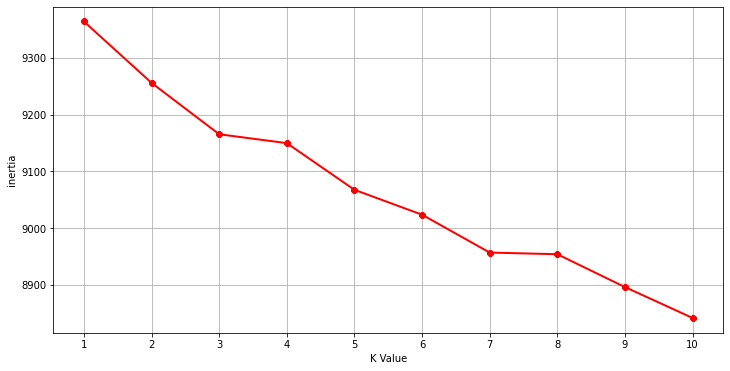

In [27]:
kmeans_results,inertia = run_KMeans(11, final_df)
plot_inertia(11,inertia)

In [ ]:
# Exploratory Data Analysis
# cluster analysis(top features/words in each cluster with top score) using 
# word cloud
# bar charts: plots most Common Words in Cluster i.e features and its score 

In [28]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

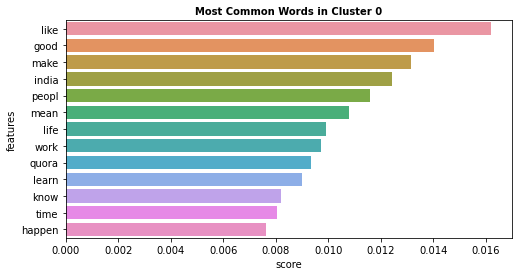

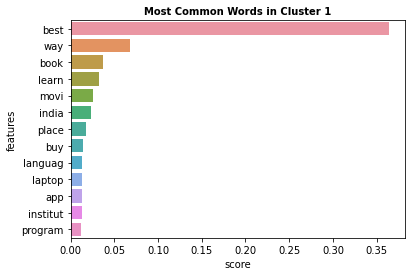

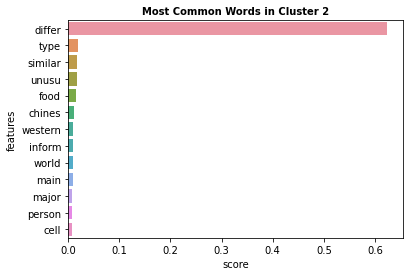

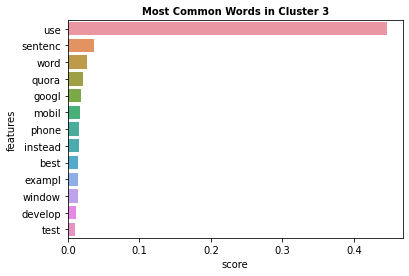

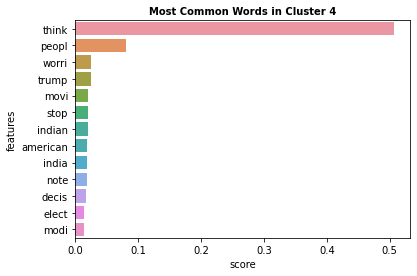

In [29]:
# you can clearly see 5 is the best value for k from the above plot using elbow method 
kmeans = kmeans_results.get(5)
final_df_array = final_df.to_numpy()
# testing  
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [ ]:
# so from the below word cloud we can clearly say that the 5 clusters represent 5 topics are 
"""
1) general life(emotions) 
2) best(laptop, book, site)
3) life style 
4) work
5) education 
"""

In [30]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)
        rcParams['figure.figsize'] = 10, 10
        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

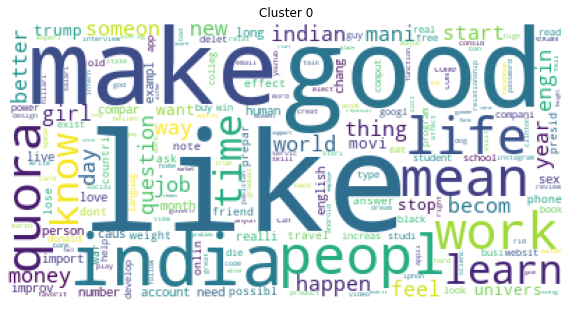

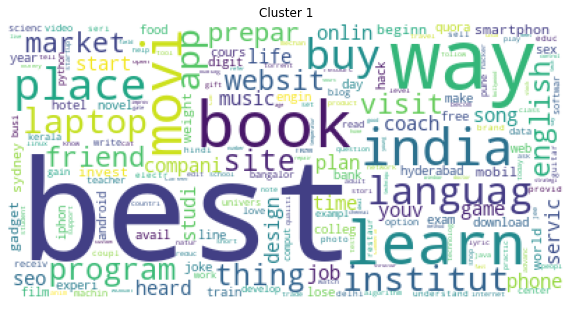

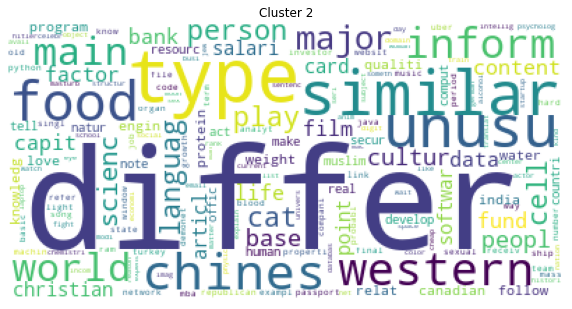

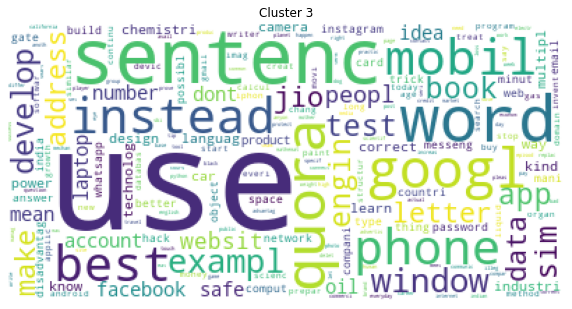

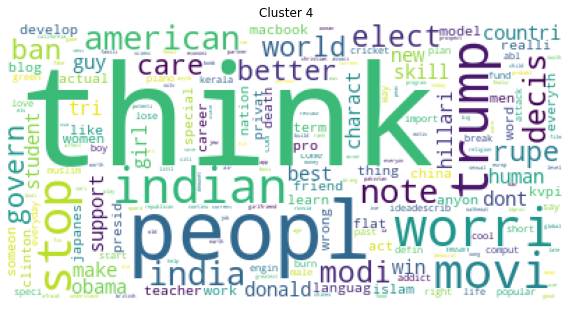

In [31]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [ ]:
# show the result of the clustering using dimensionality reduction(PCA) to plot clusters, centroids and outliers 

In [32]:
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 10000)
X_Vect = vectorizer.fit_transform(corpus)
# scale the data so that its mean is 0 and variance is 1 
tf_idf_norm = normalize(X_Vect)
tf_idf_array = tf_idf_norm.toarray()

In [ ]:
# PCA(Principle component Analysis)
"""
reduce the number of features in a dataset by creating new features from the existing ones and then discarding the 
original features. These new reduced set of features should then be able to summarize most of the info contained in 
the original set of features. In this way, a summarised version of the original features can be created from a combo
of the original set.
enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of 
significantly lower dimension without loss of any important information.
principal components are computed in such a manner that newly obtained variables are highly significant and 
independent of each other
"""

In [33]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


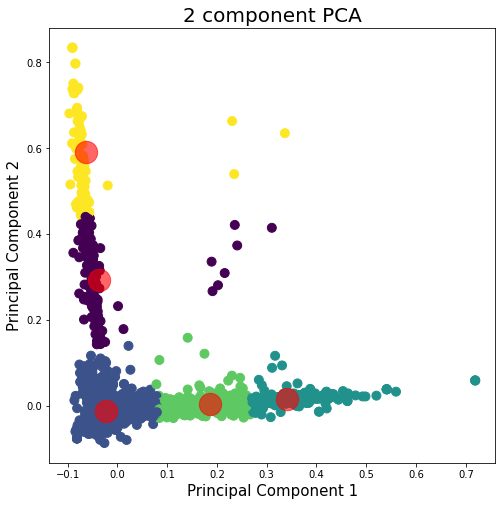

In [34]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto', init = 'k-means++')
print(kmeans)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
# viz 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=80, cmap='viridis')

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=500, alpha=0.6)

# Topic Modelling 

In [ ]:
# As a sixth step of our project we will be allocating each document its respective topic that we found above 

In [ ]:
# Latent Dirichlet Allocation
"""
Topic modeling represents a text document with the help of several topics, that can best explain the underlying 
information in a particular document
we have a collection of words that we want to group together in such a way that each group represents a topic in a 
document.
Latent: This refers to everything that we don’t know a priori and are hidden in the data. Here, the topics 
that document consists of are unknown, but they are believed to be present as the text is generated based on those 
topics.
Dirichlet: It is a ‘distribution of distributions’.In the context of topic modeling, the Dirichlet is the 
distribution of topics in documents and distribution of words in the topic.
Allocation: This means that once we have Dirichlet, we will allocate topics to the documents and words of the 
document to topics.here we have two matrices
we decompose the probability distribution matrix of word in document in two matrices consisting of distribution of 
topic in a document and distribution of words in a topic.
"""

In [ ]:
# feature extraction using count vector 
# it counts the number of times a token shows up in the document and uses this value as its weight.

In [35]:
# df:- document frequency threshold 
"""
A term’s document frequency is the number of documents in which the term occurs in
the whole collection. DF thresholding is computing the document frequency for each
unique term in the training corpus and then removing the terms whose document
frequency are less than some predetermined threshold. That is to say, only the terms
that occur many times are retained. DF thresholding is the simplest technique for
vocabulary reduction
"""
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [36]:
# fit the questions to the count vectorizer 
dtm = cv.fit_transform(questions['Question'])

In [37]:
warnings.simplefilter(action='ignore')

In [38]:
# fit the model 
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [39]:
# transform the data to the model fitted 
topic_results = LDA.transform(dtm)

In [40]:
# allocate each document a topic 
questions['topic']=topic_results.argmax(axis=1)

In [41]:
questions.iloc[11:22].reset_index(drop=True)

,Question,cleaned_question,topic
0,How do I read and find my YouTube comments?,b'read find youtub comment',2
1,What can make Physics easy to learn?,b'make physic easi learn',1
2,What was your first sexual experience like?,b'first sexual experi like',4
3,What are the laws to change your status from a...,b'law chang status student visa green card com...,3
4,What would a Trump presidency mean for current...,b'would trump presid mean current intern stude...,2
5,What does manipulation mean?,b'manipul mean',2
6,Why do girls want to be friends with the guy t...,b'girl want friend guy reject',0
7,Why are so many Quora users posting questions ...,b'mani quora user post question readili answer...,0
8,Which is the best digital marketing institutio...,b'best digit market institut banglor',1
9,Why do rockets look white?,b'rocket look white',0


# Text Classification

In [ ]:
# As a seventh step of our project We are going to build a text classifier using naive bayes algorithm and linear svc
# and compare both the models and select the model wih best accuracy so that it works as a sentiment analyzer 

In [ ]:
# Naive Bayes Algorithm 
"""
P(A|B) = P(B|A) P(A) / P(B)
P(A|B) is “Probability of A given B”, the probability of A given that B happens
P(A) is Probability of A
P(B|A) is “Probability of B given A”, the probability of B given that A happens
P(B) is Probability of B
This classifier assumes the features (in this case we had words as input) are independent. Hence the word naive
calculates the probabilities for every class. Then it selects the class with highest probability.
"""

In [ ]:
#Exploratory Data Analysis

In [42]:
def sentiment_polarity(review):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(review)['compound']

In [43]:
reviews["polarity_score"] = reviews["review"].map(sentiment_polarity)

In [44]:
reviews.head()

,review,sentiment,cleaned_review,score,polarity_score
0,One of the other reviewers has mentioned that ...,positive,b'one review mention watch episod youll hook r...,1,-0.9951
1,A wonderful little production. <br /><br />The...,positive,b'wonder littl product film techniqu fashion g...,1,0.9641
2,I thought this was a wonderful way to spend ti...,positive,b'thought wonder way spend time hot summer wee...,1,0.9605
3,Basically there's a family where a little boy ...,negative,b'basic there famili littl boy jake think ther...,0,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,b'petter mattei love time money visual stun fi...,1,0.9744


In [ ]:
# top most positive review as per sentiment polarity

In [45]:
for val in reviews.nlargest(1,columns='polarity_score')['review'].tolist():
    display(Markdown('> '+val))

> Warning: Does contain spoilers.<br /><br />Open Your Eyes<br /><br />If you have not seen this film and plan on doing so, just stop reading here and take my word for it. You have to see this film. I have seen it four times so far and I still haven't made up my mind as to what exactly happened in the film. That is all I am going to say because if you have not seen this film, then stop reading right now.<br /><br />If you are still reading then I am going to pose some questions to you and maybe if anyone has any answers you can email me and let me know what you think.<br /><br />I remember my Grade 11 English teacher quite well. His name was Mr. Krisak. To me, he was wise beyond his years and he always had this circuitous way of teaching you things that perhaps you weren't all too keen on. If we didn't like Shakespeare, then he turned the story into a modern day romance with modern day language so we could understand it. Our class room was never a room, it was a cottage and we were on the lake reading a book at our own leisure time. This was his own indelible way of branding something into our sponge-like minds. <br /><br />I begin this review of Vanilla Sky with a description of this brilliant man because he once gave us an assignment that has been firmly etched in my mind, like the phone number of a long lost best friend, and it finally made some sense to me after watching The Matrix. Now if I didn't know better, I would have thought that the Wachowski brothers were really just an alias for my teacher Mr. Krisak. But giving them the benefit of the doubt, we'll assume it wasn't him. But that was the first time this assignment was anything more than impalpable. <br /><br />He had asked us to prove to him and to ourselves that were real. Show me how you can tell that you are real. This got the class spouting off all of the usual ideas that I'm sure you can imagine. Everything from pain, to sense of touch to sense of loss to sense of hunger were spouted off to our teacher to prove to him that we were real. After every scenario that we gave him, he would come back with the one answer that would leave us speechless.<br /><br />"What if you are nothing but someone else's dream?"<br /><br />What if you were someone else's dream? What a messed up question that is. This was a question/scenario posed to us about 15 years ago, before the astronomical use of the Internet and rapid advancement of computers. How possible could it seem back then? But if you look at today's technology, now ask yourself, what it you were a part of someone else's dream.<br /><br />Another brilliant but surreal film this year, David Lynch's Mulholland Drive explored similar areas. But Vanilla Sky goes deeper than any other film could hope to. In short this is one film that will literally (if you let it) blow your mind from all of the possibilities that surround you.<br /><br />Open your Eyes.<br /><br />Tom Cruise plays David Aames, a young, hot shot, righteous, full of himself publisher and owner of several magazines. He inherited this from his father and although he has talent and business savvy, his board of governers, the Seven Dwarfs, think he is a rich dink born with a silver spoon in his mouth. They feel he has done nothing to deserve the pinnacle of success that each and every one of them believes should go to them. <br /><br />Early in the film we meet one of David's gorgeous toys named Julie Gianni, played with pernicious but bombastic perfection by Cameron Diaz. David and Julie play a good game, both claiming they are just there to use each other and are not the slightest bit interested in a monogamous, committed relationship. This is the type of relationship commensurate with David's other flings he's had in the sexual prime of his life. And although both talk a good game, we can tell that only one is really telling the truth. <br /><br />Next we meet Brian Shelby, played with a stroke of genius by Kevin Smith's good buddy Jason Lee. Brian is writing a book that David is going to publish but they are also very good friends. This is something that David has very little of in his life and you can sense a real caring for one another early on in the film. Brian has one famous line that he keeps telling David over and over again. And that is " the sweet ain't so sweet without the bitter." He goes on to tell him that one day he will find true love and not just this part time lover status that he seems to perpetrate with all of the floozies who inhabit his bed for a night or two.<br /><br />At David's huge birthday bash, (so huge that the likes of Steven Spielberg wish him a happy birthday) Brian enters with his date, Sofia Sorrano, played of course by Penelope Cruz with what has to be the best performance of this year by an actress. This is a bash by invite only and at first David and Sofia seem intrigued with one another. And in typical David fashion, despite his best friend being there, he begins to flirt with Sofia. To complicate things, Julie shows up uninvited and begins spying on David. David then spends the night with Sofia, but they only talk and draw caricatures of one another. There is no hanky panky. The next day, as David is leaving Sofia's apartment, he is greeted by Julie, who offers him a ride and from there.......well, I think we have all seen the commercials.<br /><br />That is all I will really say about the plot, because from here the film teases us with what is reality and what is blurred perception. We are introduced to a character played by Kurt Russel and a few other shady characters that all play a part in this labyrinth like haze. There is a subtext of death and possible panacea-like cure-alls that may or not be able to create the possibility of eternal life. This is just one of the intriguing possibilities the movie offers us, but it doesn't end there.<br /><br />Like many movies seem to thrive on today, this film has a secret. Sixth Sense may have began this craze, but look even further back and you can maybe thank Angel Heart for starting the craze. Regardless of how it originated, Vanilla Sky has one of it's own surreptitious gut busters. And what makes this one so much fun is that the film gives you many obvious clues along the way but not enough to give you an apodictic solution to the gauntlet of truth and lies you have just put yourself through. I have seen this film four times and every time it has been because I want to see if there is something more I can pick up, something more I can understand. To be able to work your mind in the theater, to enable it to open up to new possibilities is something rare in a film. All of the ersatz so called "Best Pictures of the year" have been good but nothing spectacular. They lack substance. A Beautiful Mind was intriguing but flat, The Royal Tenenbaums was interesting but uneven. Vanilla Sky is a rarity because it is a film that leaves you yearning for more yet guarantees your satisfaction because the film and those that made it care about it. I know this film has received mixed reviews but I just think that those who don't like it don't quite understand it. <br /><br />This is what film making is supposed to be like. This is what a film is supposed to do to you. It is supposed to make you feel something. Most of the other films this year have been just empty spaces. This one isn't.<br /><br />10 out of 10 The best film of the year. I would love to see this get nominated for best picture and I would love to see Cruz up for best Actress, Diaz for best supporting, Cruise for best actor and Jason Mewes should be a shoe in for best supporting actor. Cameron Crowe should there as well. None of this may come to pass, and that is a shame. This is one film that should not be missed. <br /><br />And on a final note, I am quite sure Mr. Krisak would like this film and maybe this is the one film that may answer his question. Can you prove you are real? Or are we just a figment of someone's imagination? Are we artificially transplanted for someone else's bemusement? This is a film that spawns more questions than it does answers. And I'm sure that is just fine with him.<br /><br />Open Your Eyes

In [ ]:
# get list of  frequent positive and negative words 

In [46]:
def get_posneg_words(cleaned_review_list):
    positive_words = []
    negative_words = []
    sid = SentimentIntensityAnalyzer()
    for i, value in enumerate(cleaned_review_list):
        # split the sentence into words 
        for val in str(value)[2:len(value)+2].split(' '): 
            # polarity score 
            scores = sid.polarity_scores(val)
            # get all positive words
            if (reviews['sentiment'].values)[i] == "positive" and scores['compound'] > 0:
                positive_words.append(val)
            elif (reviews['sentiment'].values)[i] == "negative" and scores['compound'] < 0:
                negative_words.append(val)
    return positive_words,negative_words
# call the above function 
positive_words,negative_words = get_posneg_words(reviews['cleaned_review'].tolist())

In [ ]:
# top most positive frequent words 

In [47]:
counted_words = Counter(positive_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

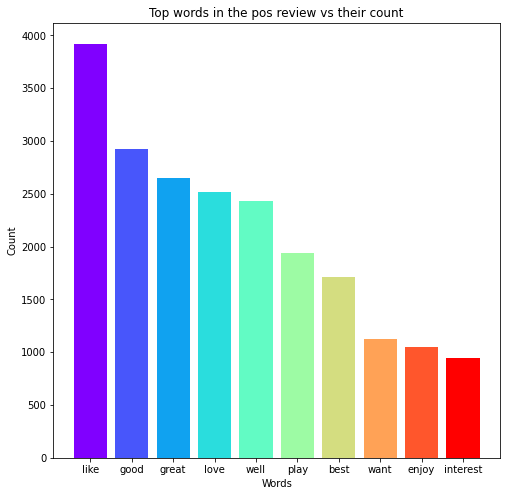

In [48]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 8, 8
plt.title('Top words in the pos review vs their count')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts, color=colors)

In [ ]:
# word cloud of positive words 

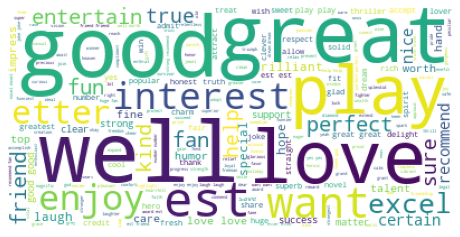

In [49]:
pos_words = [str(val).lstrip("b'").rstrip("'") for val in positive_words]
positive = ' '.join(pos_words)
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(positive)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# top most negative frequent words 

In [50]:
counted_words = Counter(negative_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

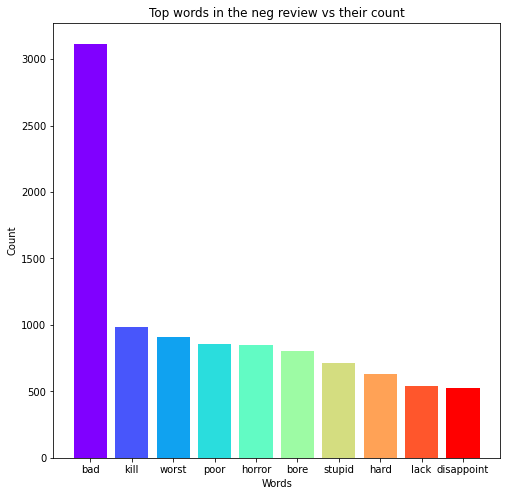

In [51]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 8,8
plt.title('Top words in the neg review vs their count')
plt.xlabel('Words')
plt.ylabel('Count')
plt.bar(words, counts, color=colors)

In [ ]:
# word cloud of negative words 

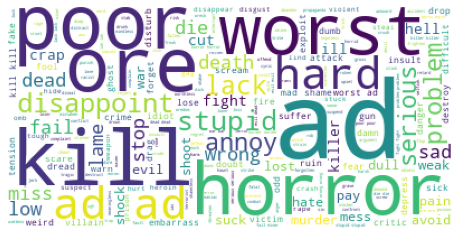

In [52]:
pos_words = [str(val).lstrip("b'").rstrip("'") for val in negative_words]
positive = ' '.join(pos_words)
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(positive)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# train test split

In [53]:
X = reviews['cleaned_review']
y = reviews['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# set y as int 
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
# Feature Extraction 

In [54]:
# extract features 
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_train = tf_idf_vect.fit_transform(X_train.values)
tf_idf_test = tf_idf_vect.transform(X_test.values)

In [ ]:
# hyper parameter alpha: smoothing 
"""
added when word is not there in the corpus 
a pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. 
this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing
"""

In [55]:
alpha_range = list(np.arange(1,50,5))
len(alpha_range)

10

In [ ]:
# We will be using k fold cross validation for parameter tuning 
"""
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate 
using the complementary subset of the data-set; In this method, we split the data-set into k number of subsets
(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation 
of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose 
each time.
"""

In [56]:
alpha_scores=[]

for a in alpha_range:
    clf = MultinomialNB(alpha=a)
    scores = cross_val_score(clf, tf_idf_train, y_train, cv=5, scoring='accuracy')
    alpha_scores.append(scores.mean())
    print(a,scores.mean())

1 0.8676119402985074
6 0.8586567164179104
11 0.852686567164179
16 0.8505970149253731
21 0.8498507462686569
26 0.8482089552238806
31 0.8479104477611941
36 0.8461194029850747
41 0.845223880597015
46 0.8444776119402985


In [ ]:
# plot alpha vs misclassification error 

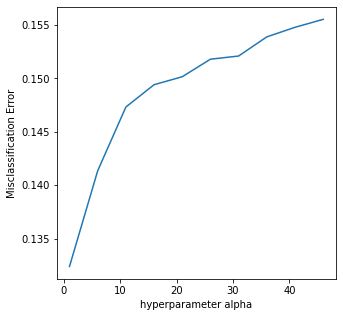

In [57]:
MSE = [1 - x for x in alpha_scores]

# plot misclassification error vs alpha
rcParams['figure.figsize'] = 5, 5

plt.plot(alpha_range, MSE)

plt.xlabel('hyperparameter alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [58]:
# train 
# from above you can clearly see alpha 1 has best accuracy 
clf = MultinomialNB()
clf.fit(tf_idf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
# test
y_pred_test = clf.predict(tf_idf_test)

In [ ]:
# predict new data 

In [60]:
myreview = "Movie which I watched yesterday is so bad"

In [61]:
cleaned_review = clean_data(myreview)
review_vector = tf_idf_vect.transform([cleaned_review])
pred = clf.predict(review_vector)
print('you can see our classifier is able to classify the sentiment accurately:',pred[0])

you can see our classifier is able to classify the sentiment accurately: 0


In [ ]:
# compare the above result with nltk's built in sentiment analyzer(vader) to check the correctness of our prediction

In [62]:
def review_rating(string):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(string)
    if scores['compound'] == 0:
        return 'Neutral'
    elif scores['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'

In [63]:
print('rating:',review_rating(myreview))
print('this testing with vader ensures that our built model is accurate')

rating: Negative
this testing with vader ensures that our built model is accurate


accuracy 86.57575757575758
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1649
           1       0.87      0.86      0.86      1651

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



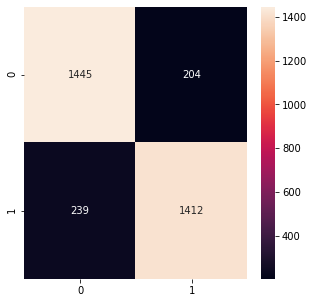

In [64]:
# evaluation metrics 
# evaluation 
print('accuracy',metrics.accuracy_score(y_test, y_pred_test) * float(100))
print(metrics.classification_report(y_test, y_pred_test))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='d')

In [ ]:
# showing the result of classification of positive(1) and negative(0) labels in scatterplot using pca 

In [65]:
# extract features using tf-idf 
tf_idf_vect = TfidfVectorizer(stop_words = 'english',max_features = 10000)
tf_idf_train_pca = tf_idf_vect.fit_transform(X_train.values)
tf_idf_test_pca = tf_idf_vect.transform(X_test.values)
tf_idf_train_array = tf_idf_train_pca.toarray()
tf_idf_test_array = tf_idf_test_pca.toarray()

In [66]:
# Applying PCA
pca = PCA(n_components = 2)
pca_train = pca.fit_transform(tf_idf_train_array)
pca_test = pca.transform(tf_idf_test_array)

In [67]:
principalDf = pd.DataFrame(data = pca_test
             , columns = ['principal component 1', 'principal component 2'])

In [68]:
finalDf = pd.concat([principalDf, y_test], axis = 1)

In [69]:
# drop missing values 
df = finalDf.dropna()

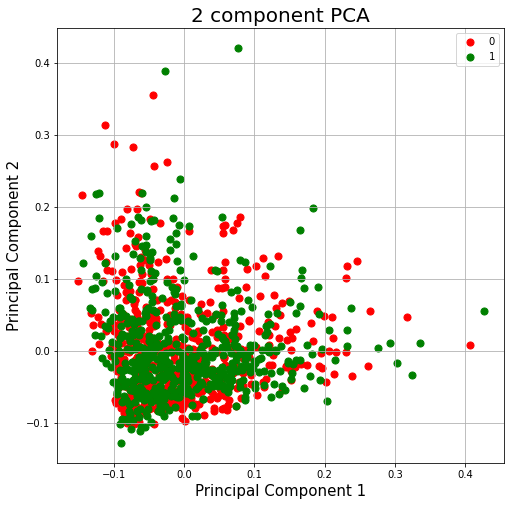

In [70]:
# viz the above pca 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['score'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<h1 style="color:skyblue">Model Selection</h1>  

In [ ]:
# As a eighth and final step of our project 
# we will be creating another text classifier using linear svc and compare it with the above naive bayes model and 
# select the model with the best accuracy and create the optimized sentiment analyzer from the best model  

In [ ]:
# scalar vector machine 
"""
The classifier separates data points using a hyperplane with the largest amount of margin.SVM finds an optimal 
hyperplane which helps in classifying new data points.It is known for its kernel trick to handle nonlinear input 
spaces.SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal 
hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a 
maximum marginal hyperplane(MMH) that best divides the dataset into classes.
Terminologies:-
Support Vectors:data points, which are closest to the hyperplane. These points will define the separating line better 
by calculating margins
Hyperplane:decision plane which separates between a set of objects having different class memberships.
margin:its a gap between the two lines on the closest class points. This is calculated as the perpendicular distance 
from the line to support vectors or closest points. If the margin is larger in between the classes, 
then it is considered a good margin, a smaller margin is a bad margin.
kernel:transform the input space to a higher dimensional space; it converts nonseparable problem to separable problems 
by adding more dimension to it; Now you can easily segregate these points using linear separation.
kernels:
Linear: normal dot product any two given observations; K(x, xi) = sum(x * xi)
"""

In [ ]:
#Parameter tuning for linear svc 
"""
1)Regularization(c):tells the SVM optimization how much you want to avoid misclassifying each training example.
  For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job
  of getting all the training points classified correctly. Conversely, a very small value of C will cause the 
  optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
2)Grid Search Cross-Validation: Does exhaustive search over specified parameter values for an estimator. Parameters of
  the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. 
"""                     

In [71]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [73]:
# decrease the no of features in tf-idf matrix to optimize grid search 
tf_idf_vect_tune = TfidfVectorizer(ngram_range=(1,2),max_features = 1000)
tf_idf_train_tune = tf_idf_vect_tune.fit_transform(X_train.values)

In [74]:
print('the best parameters are',svc_param_selection(tf_idf_train_tune, y_train, 5))

the best parameters are {'C': 1}


In [ ]:
#train and test 

In [72]:
# model training 
clf = svm.SVC(kernel="linear", C=1)
clf.fit(tf_idf_train, y_train)
# testing 
y_pred_test = clf.predict(tf_idf_test)

In [73]:
clf

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict new data  

In [74]:
pred = clf.predict(review_vector)
print('you can see our classifier is able to classify the sentiment accurately:',pred[0])

you can see our classifier is able to classify the sentiment accurately: 0


In [ ]:
# evaluation 
# you can clearly see linear svc has better accuracy than naive bayes not by much difference but it still matters 

accuracy 87.87878787878788
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1649
           1       0.87      0.90      0.88      1651

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



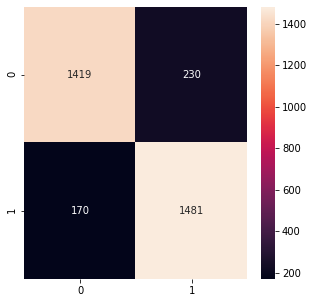

In [75]:
print('accuracy',metrics.accuracy_score(y_test, y_pred_test) * float(100))
print(metrics.classification_report(y_test, y_pred_test))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test),annot=True,fmt='d')

In [ ]:
# plot the linear kernel and decision boundary for svc using scatter and contour plot

In [76]:
# Fitting linear kernel to the PCA Training set
clf = svm.SVC(kernel="linear", C=1)
clf.fit(pca_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

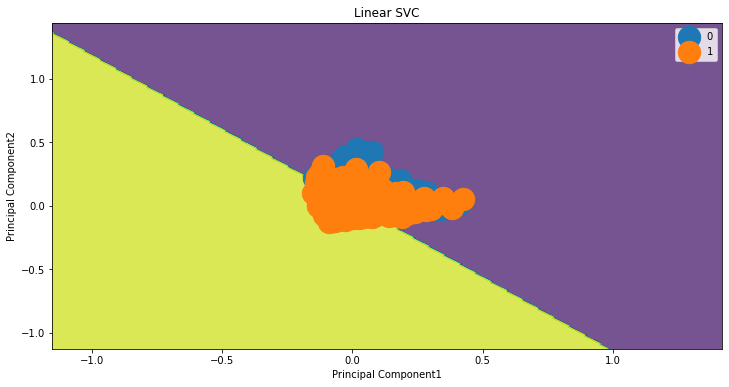

In [77]:
X_set, y_set = pca_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(12,6))    
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 label = j,s = 500)
plt.title('Linear SVC')
plt.xlabel('Principal Component1')
plt.ylabel('Principal Component2')
plt.legend()
plt.show()

# !Thank you 